# BSD2513 ARTIFICIAL INTELLIGENCE 

## LAB REPORT 6

##### NAME : TEAN JIN HE
#### MATRIC ID : SD21063
#### SECTION : 02G 

#### *Questions 1 : General Knowledge* 

Explain the applications of speech recognition in real world problems. Give reference/s.


#### *Question 2 Python: Speech Recognition*

Most commonly, speech signals are sampled at 44,100 Hz. This means that each second of the speech signal
is broken down into 44,100 parts and the values at each of these timestamps is stored in an output file.



Create an audio generator visualisation code.

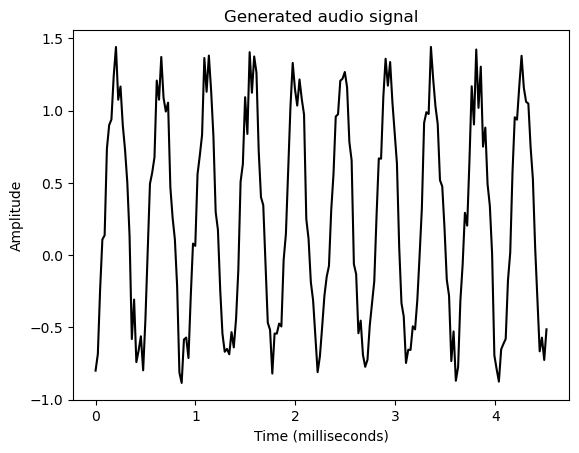

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Output file where the audio will be saved 
output_file = 'SD21063_generated_audio.wav'

# Specify audio parameters
duration = 5  # in seconds
sampling_freq = 44100  # in Hz
tone_freq = 440 
min_val = -4 * np.pi
max_val = 4 * np.pi

# Generate the audio signal
t = np.linspace(min_val, max_val, duration * sampling_freq)
signal = np.sin(2 * np.pi * tone_freq * t)

# Add some noise to the signal
noise = 0.5 * np.random.rand(duration * sampling_freq)
signal += noise

# Scale it to 16-bit integer values
scaling_factor = np.power(2, 15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

# Save the audio signal in the output file 
write(output_file, sampling_freq, signal_scaled)

# Extract the first 200 values from the audio signal 
signal = signal[:200]

# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq) 

# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()



Signal shape: (220500,)
Datatype: int16
Signal duration: 5.0 seconds


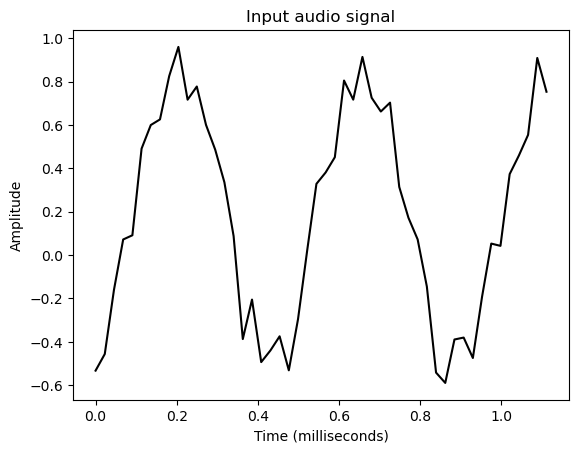

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Speech signals are sampled at 44,100 Hz
# Each seccond of the speech signal is broken down into 44,100 Hz (1/44,100 sec)

# Read the audio file
sampling_freq, signal = wavfile.read('SD21063_generated_audio.wav')

# Display the params
print('\nSignal shape:', signal.shape)
print('Datatype:', signal.dtype)
print('Signal duration:', round(signal.shape[0] / float(sampling_freq), 2), 'seconds')

# Normalize the signal 
signal = signal / np.power(2, 15)

# Extract the first 50 values
signal = signal[:50]

# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq)

# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

Transform audio signals to the frequency domain.

C:\Users\user\AppData\Local\Temp\ipykernel_19928\3857506365.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  len_half = np.ceil((len_signal + 1) / 2.0).astype(np.int)


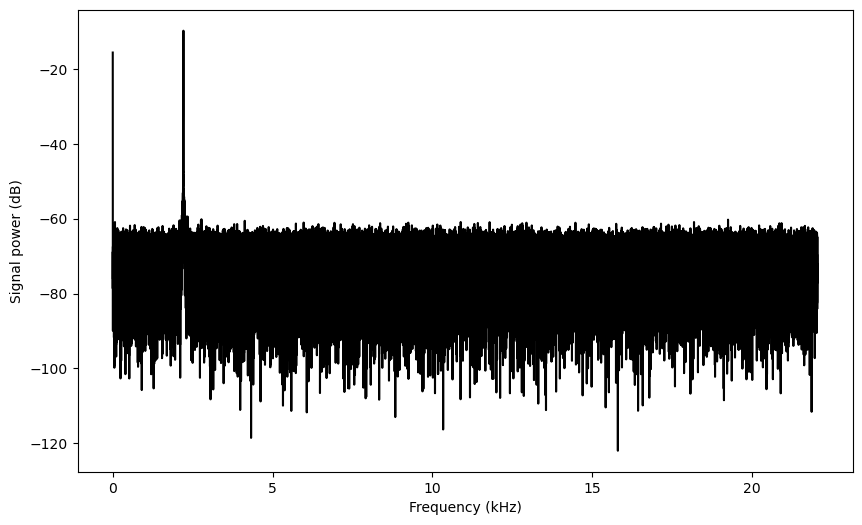

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read the audio file
sampling_freq, signal = wavfile.read('SD21063_generated_audio.wav')

# Normalize the values
signal = signal / np.power(2, 15) 

# Extract the length of the audio signal
len_signal = len(signal)

# Extract the half length
len_half = np.ceil((len_signal + 1) / 2.0).astype(np.int)

# Apply Fourier transform
freq_signal = np.fft.fft(signal)

# Normalization
freq_signal = abs(freq_signal[0:len_half]) / len_signal

# Take the square
freq_signal **= 2

# Extract the length of the frequency transformed signal
len_fts = len(freq_signal)

# Adjust the signal for even and odd cases
if len_signal % 2:
    freq_signal[1:len_fts] *= 2
else:
    freq_signal[1:len_fts-1] *= 2

# Extract the power value in dB (unit for signal power)
signal_power = 10 * np.log10(freq_signal)

# Build the X axis
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 1000.0

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plot the figure
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()